# Mod 3 Project
## Classification of
mod3project

## Important Functions

In [1056]:
#import files

from bs4 import BeautifulSoup
import pandas as pd
import json
import time
import requests
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r

In [6]:
def get_review_content(df):
    return [df['reviews'][i]['review'] for i in range(len(df['reviews']))]

In [7]:
def get_steamlist():
    return requests.get('http://api.steampowered.com/ISteamApps/GetAppList/v0002/').json()

games_df = pd.DataFrame(get_steamlist()['applist']["apps"])
games = get_steamlist()['applist']["apps"]

In [8]:
def get_appid(name, games):
    for i in range(len(games['name'])):
        if games['name'][i].title() == name.title():
            return games['appid'][i]
    return "Did not find"

def get_game_info(appid):
    url = 'https://store.steampowered.com'
    ids = str(appid)
    r = requests.get(url+'/api/appdetails?appids='+ids).json()
    return r

In [9]:
# we ended last on Tuesday on 15,000

def retrieve_steam_data(start, end):
    data_from_steam_ = []
    for num, game in enumerate(games[start: end]):
        if game["appid"] >= 10:
            data_from_steam_.append(get_game_info(game["appid"]))
        if num % 100 == 0:
            t = np.random.choice([1,1.1,1.2,1.3,1.4,1.5])
            print(num, t)
            time.sleep(t)
    return data_from_steam_ 
    
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r


In [10]:
def save_data(data, file_to_save_to):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [11]:
def open_save_data(file_to_open):
        """takes in a filename to open
           return """
        with open(file_to_open) as datajson:
            new_data =json.load(datajson)
        return new_data

# Open Json Files

In [402]:
k10 = open_save_data("10K_data.json")
k15 = open_save_data("15K_data.json")
k20 = open_save_data("test_20k.json")
k30 = open_save_data("30K_data.json")
k40_1k = open_save_data("1000_data_30000.json")
k40_2k = open_save_data("2000_data_30000.json")
k40_3k = open_save_data("3000_data_30000.json")
k40_4k = open_save_data("4000_data_30000.json")
k40_5k = open_save_data("5000_data_30000.json")
k40_6k = open_save_data("6000_data_30000.json")
k40_7k = open_save_data("7000_data_30000.json")
k40_8k = open_save_data("8000_data_30000.json")
k40_9k = open_save_data("9000_data_30000.json")
k40_10k = open_save_data("test_40k.json")
k50 = open_save_data("50K_data.json")
k60 = open_save_data("60K_data.json")
t1 = open_save_data('1000_data_60000.json')
t2 = open_save_data('2000_data_60000.json')
t3 = open_save_data('3000_data_60000.json')
t4 = open_save_data('4000_data_60000.json')
t5 = open_save_data('5000_data_60000.json')
k76 = open_save_data('76K_data.json')

# Combine to 1 complete dataset

In [491]:
all_30K = np.array(k10+k15+k20+k30)
all_40K = k10+k15+k20+k30+k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k
all_60k = all_50K + k60
k65 = t1+t2+t3+t4+t5
some_30K_40K = k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k
k60_k76 = k65+k76
all_50K = all_40K + k50
all_76K = all_60K + k65+k76

# Functions for Initial Clean

In [1089]:
# helper for the clean non_id
def del_unwanted(dic, unwanted_lst):
    dic_copy = copy.deepcopy(dic)
    for key in unwanted_lst:
        if key in dic_copy:
            del dic_copy[key]
    return dic_copy

def clean_non_id_data(games_list, start, end):
    data_dic_lst = []
    data_f = copy.deepcopy(games_list)
    for game in data_f[start:end]:
        if type(game) == dict:
            for key, val in game.items():
                if "success" in val:
                        del val["success"]
                if val != {}:
                    new_val = del_unwanted(val["data"], ["header_image", "website", "packages", "package_groups",
                                                        "screenshots", "movies", "support_info", "background",
                                                        "content_descriptors", "controller_support", "drm_notice",
                                                        "ext_user_account_notice", "detailed_description", 
                                                        "short_description", "legal_notice", "linux_requirements",
                                                        "mac_requirements", "fullgame", "publishers", "demos",
                                                        "pc_requirements", "release_date", 'alternate_appid'])
            
                    data_dic_lst.extend([new_val])
    return data_dic_lst

## Removing Columns we don't need

In [1467]:
cleaned_76K = clean_non_id_data(all_76K,0, len(all_76K))
len(cleaned_76K)

25953

In [1070]:
# final copy
# save_data(cleaned_76K, 'ALL_cleaned.json')

## More cleaning organizing columns

In [1435]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

platforms_lst = ["windows", "mac", "linux"]

def get_clean_dummies(clean_dic, desc_key, descriptions, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        for key in descriptions:
            data[key] = 0
        if desc_key in data:
            for cat in data[desc_key]:
                if cat["description"] in descriptions:
                    data[cat["description"]] = 1
            del data[desc_key]
    return cleaned


def get_platform_dummies(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned: 
        if "platforms" in data:
            for key in platforms_lst:
                data[key] = 0 
                if key in data["platforms"]:
                    data[key] = int(data["platforms"][key])
        else:
            for key in platforms_lst:
                data[key] = 0 
        del data["platforms"]
    return cleaned

def get_total_from_dic(clean_dic, column, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if column in data:
            data[column] = data[column]["total"]
        else:
            data[column] = 0
    return cleaned

def get_metas_from_dic(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "metacritic" in data:
            data["metacritic"] = data["metacritic"]["score"]
        else:
            data["metacritic"] = 0
    return cleaned

def clean_dev(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    cleaned = copy.deepcopy(clean_dic)
    for data in cleaned:
        if "developers" in data:
            data["developers"] = ", ".join(data["developers"])
        else:
            data["developers"] = ""
    return cleaned

def dlc_reformatting(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "dlc" in data:
            data["dlc"] = len(data["dlc"])
        else:
            data["dlc"] = 0
    return cleaned

# def date_reformatting(clean_dic, keep=True):
#     if keep:
#         cleaned = copy.deepcopy(clean_dic)
#     else:
#         cleaned = clean_dic
#     for data in cleaned:
#         if "release_date" in data:
#             if data["release_date"]["date"][:3] in months:
#                 data["release_date"] = months[data["release_date"]["date"][:3]]
#             else:
#                 data["release_date"] = 0
#         else:
#                 data["release_date"] = 0
#     return cleaned

def convert_to_1_0(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "is_free" in data:
            data["is_free"] = int(data["is_free"])
        else:
            data["is_free"] = 0
    return cleaned

def clean_money(clean_dic, nans_to_zero=False, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "price_overview" in data:
            if data["price_overview"]["currency"] == "USD":
                data["price_overview"] = round(data["price_overview"]["final"]*.01, 2)
            else:
                data["price_overview"] = 0
        else:
            if nans_to_zero:
                data["price_overview"] = 0
    return cleaned

def clean_language(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "supported_languages" in data:
            data["num_supported_languages"] = len(data["supported_languages"].split(","))
            del data["supported_languages"]
        else:
             data["num_supported_languages"] = 1
        
    return cleaned


In [1436]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

def clean_data(dirty_dic, keep=False):
    clean_money(dirty_dic, True, keep)
    clean_dev(dirty_dic, keep)
    convert_to_1_0(dirty_dic, keep)
    dlc_reformatting(dirty_dic, keep)
    get_clean_dummies(dirty_dic, "categories", cats, keep)
    get_clean_dummies(dirty_dic, "genres", genres, keep)
    get_total_from_dic(dirty_dic, "recommendations", keep)
    get_total_from_dic(dirty_dic, "achievements", keep)
    get_platform_dummies(dirty_dic, keep)
    get_metas_from_dic(dirty_dic, keep)
    clean_language(dirty_dic, keep=keep)
    return pd.DataFrame(dirty_dic)

In [1468]:
df_cleaned_76K = clean_data(cleaned_76K)
df_cleaned_76K.shape
#all cleaned

(25953, 38)

# Quick Exploration of the Data

In [1439]:
df_cleaned_76K.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'reviews', 'steam_appid', 'type', 'windows'],
      dtype='object')

In [1096]:
df_cleaned_76K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows
count,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,...,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,2.595300e+04,25953.0,2.595300e+04,25953.000000
mean,0.342542,0.263862,0.259508,0.104150,0.062228,0.056834,0.062806,0.515123,0.026818,0.042115,...,0.122375,0.212153,0.317420,3.747544,3.252187,6.244652,4.027010e+02,0.0,5.721254e+05,0.999306
std,0.474569,0.440734,0.438373,0.305461,0.241574,0.231529,0.242618,0.499781,0.161553,0.200854,...,0.327725,0.408840,0.465481,16.192600,4.351416,30.270805,1.534542e+04,0.0,2.530525e+05,0.026327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,1.000000e+01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,3.693700e+05,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000e+00,0.0,5.567100e+05,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,4.000000,7.990000,0.000000e+00,0.0,7.799340e+05,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,96.000000,29.000000,4500.000000,2.182507e+06,0.0,1.055950e+06,1.000000


In [1446]:
df_cleaned_76K[df_cleaned_76K.price_overview > 100]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,name,num_supported_languages,price_overview,recommendations,required_age,reviews,steam_appid,type,windows
1641,0,0,0,0,0,0,0,0,0,0,...,0,VEGAS Pro 15 Edit Steam Edition,4,359.00,0,0,NaN,689790,game,1
2171,0,0,0,0,0,0,0,0,0,0,...,0,Strata Design 3D SE - CX Upgrade,1,149.99,0,0,NaN,671070,dlc,1
2709,1,1,0,0,0,0,0,1,0,0,...,0,CrisisActionVR,2,199.99,0,0,NaN,648070,game,1
6044,0,0,0,0,0,0,0,0,0,0,...,0,Marmoset Toolbag 3,1,189.00,0,0,NaN,550060,game,1
6258,0,0,0,0,0,0,1,0,0,0,...,0,Skyforge - Costume Booster Pack,3,119.99,0,0,NaN,546374,dlc,1
9802,0,0,0,0,0,0,0,0,0,0,...,0,ADR-Labelling Game,4,595.99,0,0,NaN,821800,game,1
9971,1,1,0,0,0,0,0,1,0,0,...,0,INFINITY CHALLENGE,1,199.99,0,0,NaN,819660,game,1
10003,0,0,0,0,0,0,0,0,0,0,...,0,Facerig Studio for Individual VTubers w/Live2D,9,450.00,0,0,NaN,816940,dlc,1
10094,0,0,0,0,1,0,1,0,0,0,...,0,Call of War: Global Domination Pack,11,199.99,0,0,NaN,815356,dlc,1
10221,0,0,0,0,0,0,0,0,0,0,...,0,Dollal Simulator Gold Edition,1,199.99,0,0,NaN,807410,dlc,1


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


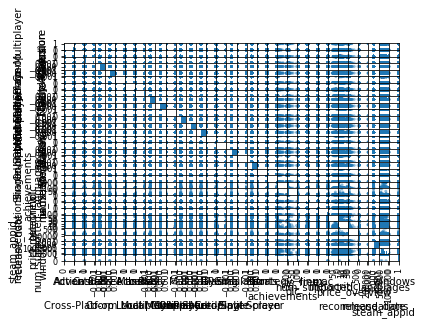

In [461]:
pd.plotting.scatter_matrix(df_clean_30K, figsize);

Alot of variables

# Gathering Review Data

## Functions to Clean

In [ ]:
#def clean_text(text):

def clean_review(lst_reviews):
    check = ['review_score','total_positive', 'total_negative', 'total_reviews']
    data_storage = []
    for rev in lst_reviews:
        app_id = list(rev.keys())[0]
        review_dict = {}
        review_dict["steam_appid"] = int(app_id)
        review_dict["reviews"] = ""
        for key in check:
            if "query_summary" in rev[app_id]:
                if key in rev[app_id]["query_summary"]:
                    review_dict[key] = rev[app_id]["query_summary"][key]
        if "reviews" in rev[app_id]:
            for text in rev[app_id]["reviews"]:
                review_dict["reviews"] += " " + text["review"]
        data_storage.append(review_dict)
    return data_storage

In [1448]:
review_try_1 = open_save_data("reviews_from_first_clean30k.json")

In [1449]:
review_try_2 = open_save_data("reviews_from_clean30k_50k.json")

In [1450]:
review_try_3 = open_save_data("reviews_from_clean50K_60K.json")

In [1451]:
review_try_4 = open_save_data("reviews_from_clean60K_76K.json")

In [1104]:
review_try_4[0]

{'10': {'success': 1,
  'query_summary': {'num_reviews': 20,
   'review_score': 9,
   'review_score_desc': 'Overwhelmingly Positive',
   'total_positive': 32367,
   'total_negative': 964,
   'total_reviews': 33331},
  'reviews': [{'recommendationid': '49803728',
    'author': {'steamid': '76561198407734752',
     'num_games_owned': 39,
     'num_reviews': 9,
     'playtime_forever': 526,
     'playtime_last_two_weeks': 1,
     'last_played': 1552778818},
    'language': 'english',
    'review': 'Perfect childhood game!',
    'timestamp_created': 1553770027,
    'timestamp_updated': 1553770027,
    'voted_up': True,
    'votes_up': 0,
    'votes_funny': 0,
    'weighted_vote_score': 0,
    'comment_count': 0,
    'steam_purchase': True,
    'received_for_free': False,
    'written_during_early_access': False},
   {'recommendationid': '49802949',
    'author': {'steamid': '76561198815796326',
     'num_games_owned': 18,
     'num_reviews': 1,
     'playtime_forever': 212,
     'playtime_

In [1452]:
review_combo = review_try_1 + review_try_2 + review_try_3 + review_try_4

In [1453]:
len(review_combo)

25953

In [1454]:
review_for_df_final = clean_review(review_combo)

Making sure our data two DF match up

In [1478]:
df_cleaned_final_final = df_cleaned_76K.drop("reviews", axis=1).copy()

In [1479]:
len(review_for_df_final)

25953

In [1480]:
len(df_cleaned_final_final)

25953

In [1473]:
# df for all the reviews
df_all_76K_rev = pd.DataFrame(review_for_df_final)

In [1132]:
df_all_76K_rev.to_json("FINAL_REVIEW.json")

## Removing Duplicates

In [1474]:
# remove duplicates from reviews
df_rev_no_dups_final = df_all_76K_rev.drop_duplicates("steam_appid")

In [1475]:
df_rev_no_dups_final.shape

(22646, 6)

In [1482]:
# remove duplicates from original df of game info
df_cleaned_final_final = df_cleaned_final_final.drop_duplicates("steam_appid")

In [1483]:
df_cleaned_final_final.shape

(22646, 37)

## Sort and Merge Review and game info DF

In [1484]:
df_review_final = df_rev_no_dups_final.sort_values("steam_appid")

In [1485]:
df_cleaned_final = df_cleaned_final_final.sort_values("steam_appid")

In [1486]:
df_cleaned_final.shape

(22646, 37)

In [1487]:
df_review_final.shape

(22646, 6)

In [1488]:
final_df = df_cleaned_final.merge(df_review_final, on="steam_appid")

In [1491]:
final_df

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,recommendations,required_age,steam_appid,type,windows,review_score,reviews,total_negative,total_positive,total_reviews
0,1,0,0,0,0,0,0,0,0,1,...,65391,0,10,game,1,9.0,Perfect childhood game! Acest joc pot sa spun...,964.0,32367.0,33331.0
1,1,0,0,0,0,0,0,0,0,1,...,2786,0,20,game,1,8.0,i have no idea what im doing. I've always lik...,405.0,2172.0,2577.0
2,1,0,0,0,0,0,0,0,0,0,...,1979,0,30,game,1,8.0,Too many hicks in this game! Zivoragnom!!! Ve...,191.0,1660.0,1851.0
3,1,0,0,0,0,0,0,0,0,1,...,922,0,40,game,1,8.0,Shame no one plays it its kinda like roblox h...,134.0,708.0,842.0
4,1,0,0,0,0,0,0,0,0,0,...,4304,0,50,game,1,8.0,"Loved half-life 1, one of my favorite games. ...",163.0,2897.0,3060.0
5,1,0,0,0,0,0,0,0,0,0,...,2086,0,60,game,1,8.0,Quality Best game 10/10 and I love playing wi...,353.0,1870.0,2223.0
6,1,0,0,0,0,0,0,0,0,0,...,22113,0,70,game,1,9.0,Totally fun FPS shooter. It's Half Life...do ...,553.0,13736.0,14289.0
7,1,0,0,0,0,0,0,0,0,0,...,8807,0,80,game,1,8.0,A singleplayer Counter-Strike?! Great Game. 5...,466.0,4128.0,4594.0
8,1,0,0,0,0,0,0,0,0,0,...,3296,0,130,game,1,8.0,Released as the second expansion to the origi...,242.0,2102.0,2344.0
9,1,0,0,0,1,0,1,0,0,0,...,10409,0,440,game,1,8.0,its alright I guess. very such good game i've...,18615.0,286430.0,305045.0


In [1152]:
final_df.to_json("FINAL_DF.json")

In [1153]:
final_df.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows,review_score,total_negative,total_positive,total_reviews
count,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.00000,22646.000000,22646.000000,22646.000000,...,22646.000000,22646.000000,2.264600e+04,22646.0,2.264600e+04,22646.000000,22645.000000,22645.000000,22645.000000,22645.000000
mean,0.337322,0.261503,0.264638,0.100901,0.060585,0.057538,0.06085,0.509406,0.027245,0.045218,...,3.250817,6.053175,4.014205e+02,0.0,6.027442e+05,0.999647,2.003003,48.529079,234.787414,283.316494
std,0.472806,0.439463,0.441150,0.301204,0.238572,0.232872,0.23906,0.499923,0.162801,0.207786,...,4.376392,32.217997,1.618673e+04,0.0,2.565940e+05,0.018792,3.004088,1218.969026,6517.368144,7520.408667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.0,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.0,4.220850e+05,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,2.990000,0.000000e+00,0.0,6.089415e+05,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,4.000000,7.990000,0.000000e+00,0.0,8.152325e+05,1.000000,5.000000,4.000000,12.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,29.000000,4500.000000,2.182507e+06,0.0,1.055950e+06,1.000000,9.000000,119918.000000,857118.000000,977036.000000


In [1490]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'steam_appid', 'type', 'windows', 'review_score',
       'reviews', 'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [1492]:
final_df.drop("steam_appid", axis=1,inplace = True)

In [1493]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'type', 'windows', 'review_score', 'reviews',
       'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [1494]:
# sort for only games type
final_df = final_df[(final_df.type == "game")]

In [1495]:
final_df.shape

(11127, 41)

In [1496]:
# Null hypothesis price can not be classified by these features

In [1498]:
# dropping extra columns because 
final_df0 = final_df.drop(['reviews','type', 'about_the_game', "developers"], axis=1) 

In [1499]:
final_df0.drop("name", axis=1, inplace=True) 

In [1283]:
final_df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11126 entries, 0 to 22645
Data columns (total 36 columns):
Action                        11126 non-null int64
Adventure                     11126 non-null int64
Casual                        11126 non-null int64
Co-op                         11126 non-null int64
Cross-Platform Multiplayer    11126 non-null int64
Early Access                  11126 non-null int64
Free to Play                  11126 non-null int64
Indie                         11126 non-null int64
Local Co-op                   11126 non-null int64
Local Multi-Player            11126 non-null int64
Massively Multiplayer         11126 non-null int64
Multi-player                  11126 non-null int64
Online Co-op                  11126 non-null int64
Online Multi-Player           11126 non-null int64
RPG                           11126 non-null int64
Racing                        11126 non-null int64
Shared/Split Screen           11126 non-null int64
Simulation              

In [1500]:
final_df0[final_df0.total_negative.isnull() == True]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,num_supported_languages,price_overview,recommendations,required_age,windows,review_score,total_negative,total_positive,total_reviews
20934,1,0,0,0,0,0,0,1,0,0,...,0,1,0.0,0,0,1,NaN,NaN,NaN,NaN


In [1501]:
# Dropping all nulls
final_df0 = final_df0.drop(final_df0[final_df0.total_negative.isnull() == True].index)

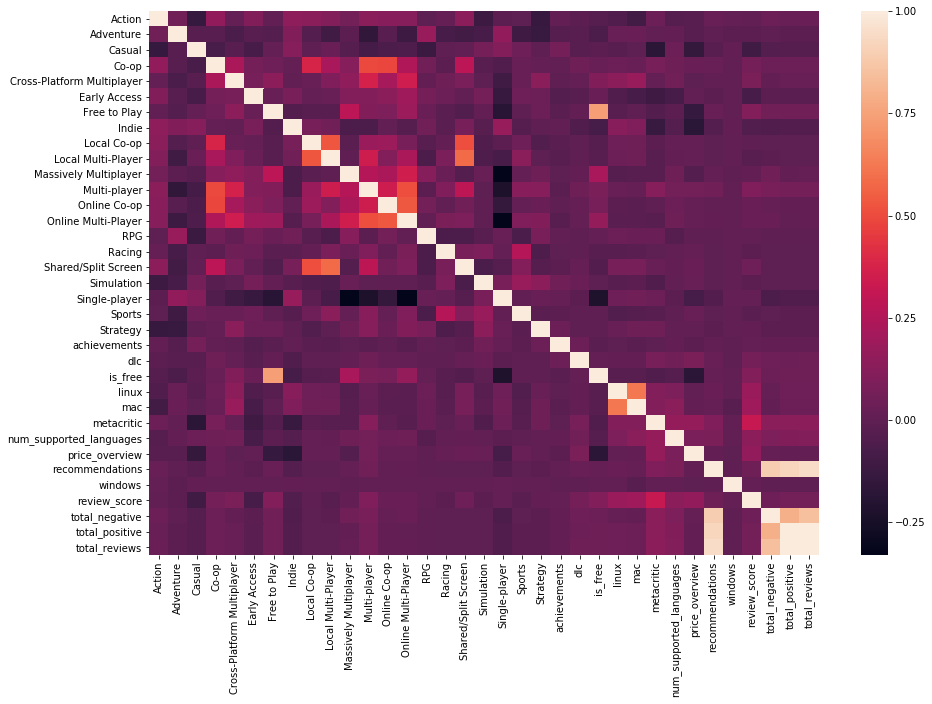

In [1502]:
correlations = final_df0.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlations)

In [1503]:
final_df0.reset_index(inplace=True)
y = final_df0.price_overview
X = final_df0.drop(["price_overview"], axis=1)

In [1504]:
from sklearn.preprocessing import StandardScaler
x_col = X[["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic']]
X_scale = StandardScaler().fit_transform(x_col)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


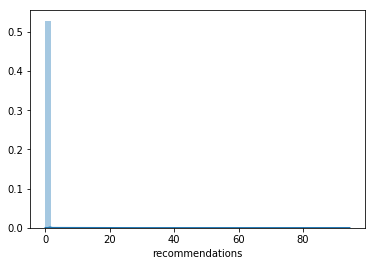

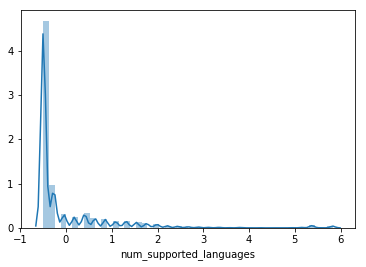

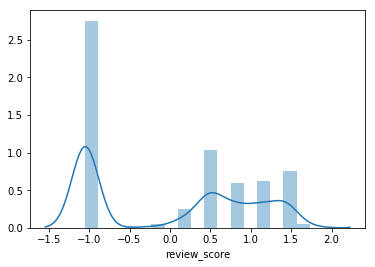

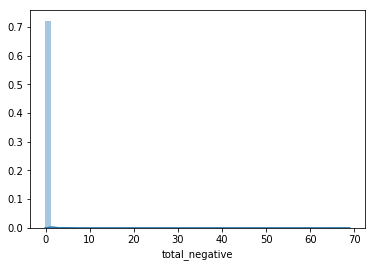

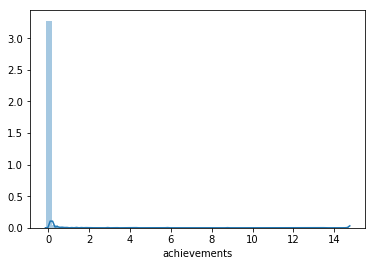

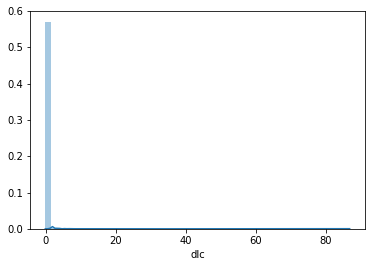

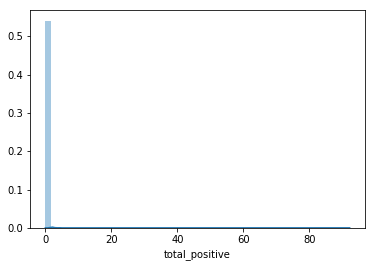

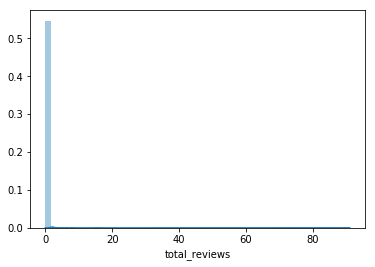

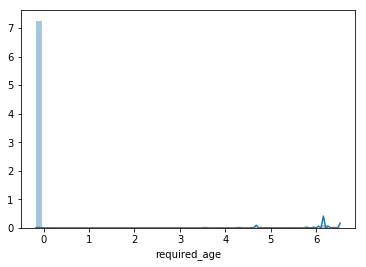

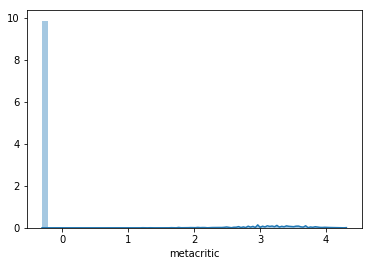

In [1373]:
for col in x_col:
    sns.distplot(X[col])
    plt.show()

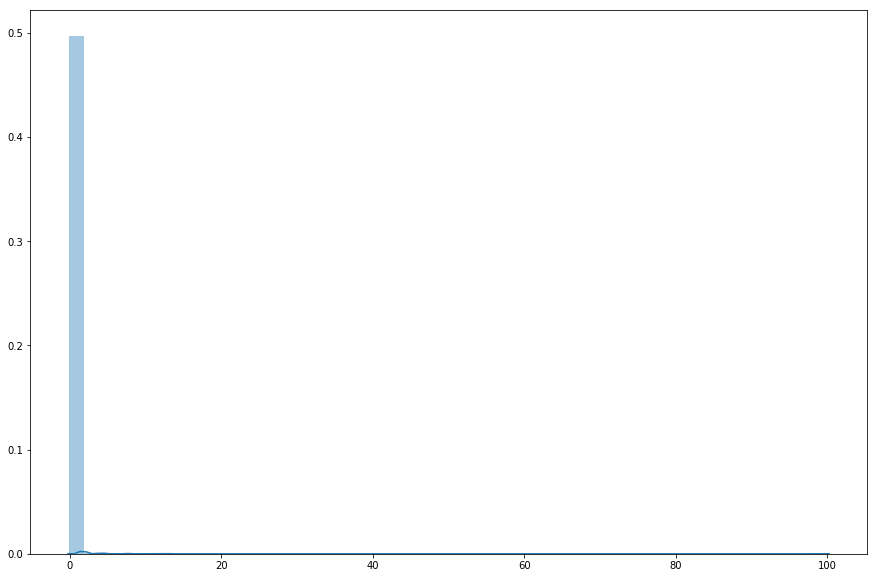

In [1386]:
plt.figure(figsize=(15,10))
sns.distplot(y)

In [1505]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ration Explanation')

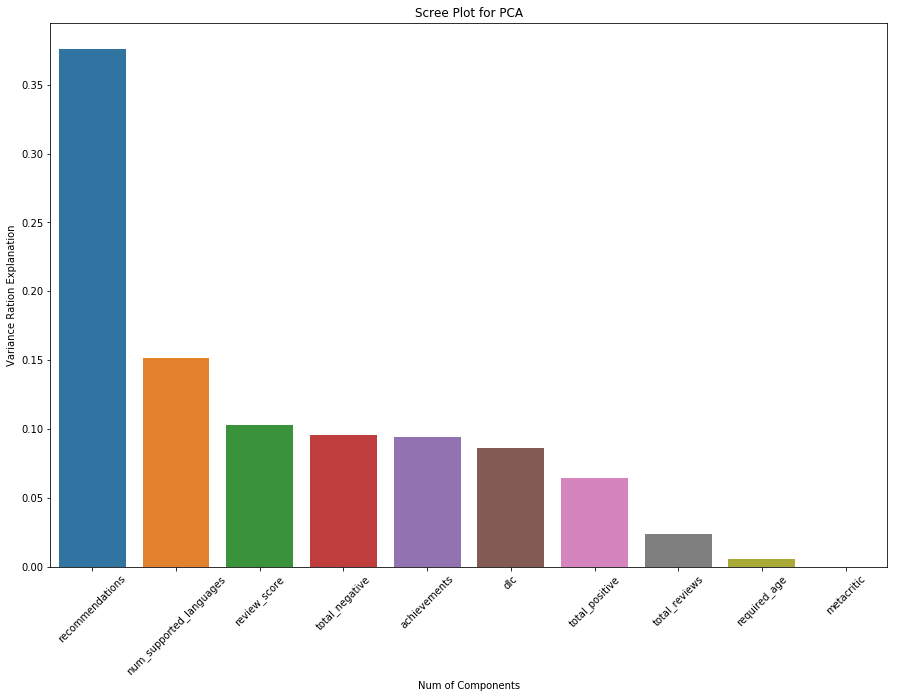

In [1506]:
index = X_scaled_df.columns
plt.figure(figsize=(15,10))
sns.barplot(index, pca.explained_variance_ratio_ )
plt.xticks(rotation=45)
plt.title("Scree Plot for PCA")
plt.xlabel("Num of Components")
plt.ylabel("Variance Ration Explanation")

### Observation

PCA shows us that we can drop required_age and metacritic. We will drop the two features mention prior and replace the other features with their scaled values

In [1507]:
X_scaled_df = pd.DataFrame(data=X_scale, columns=["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic'])

In [1508]:
X_drop = X.drop(x_col, axis=1)

In [1509]:
X = X_drop.merge(X_scaled_df, on=X_drop.index)

In [1536]:
X.drop(["key_0","index"], axis=1,inplace=True)

KeyError: "['key_0' 'index'] not found in axis"

In [1537]:
X_final = X.drop(["required_age", "metacritic"], axis=1)

In [1512]:
y.mean()

7.114850799928532

In [1513]:
y.std()

12.271757173162856

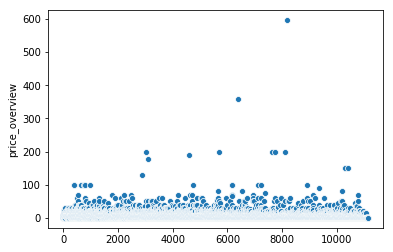

In [1514]:
x_lin = np.linspace(1, 11126, 11126)
sns.scatterplot(x_lin, y)

In [1529]:
y_df = pd.DataFrame(y.copy())

In [1552]:
y_df[y_df.price_overview <= y_df.price_overview.quantile(.25)] = 1
y_df[(y_df.price_overview > y_df.price_overview.quantile(.25)) & (y_df.price_overview <= y_df.price_overview.quantile(.50))] =2
y_df[(y_df.price_overview > y_df.price_overview.quantile(.50)) & (y_df.price_overview <= y_df.price_overview.quantile(.75))] =3
y_df[(y_df.price_overview > y_df.price_overview.quantile(.75))] = 4


In [1555]:
y_stats = y_df.astype(int)

In [1532]:
y_intuitive = pd.DataFrame(y.copy())

In [1533]:
y_df = pd.DataFrame(y)
y_df[y_df.price_overview > 1000]

,price_overview


In [1538]:
X_final

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,mac,windows,recommendations,num_supported_languages,review_score,total_negative,achievements,dlc,total_positive,total_reviews
0,1,0,0,0,0,0,0,0,0,1,...,1,1,2.797614,1.085974,1.731501,0.499428,-0.120398,-0.084856,3.433450,3.056581
1,1,0,0,0,0,0,0,0,0,1,...,1,1,0.085731,1.311647,1.422777,0.177711,-0.120398,-0.084856,0.183507,0.187841
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0.050774,0.408954,1.422777,0.054549,-0.120398,-0.084856,0.128399,0.120120
3,1,0,0,0,0,0,0,0,0,1,...,1,1,0.004987,1.311647,1.422777,0.021744,-0.120398,-0.084856,0.025934,0.026000
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0.151486,0.183281,1.422777,0.038434,-0.120398,-0.084856,0.261540,0.232896
5,1,0,0,0,0,0,0,0,0,0,...,1,1,0.055409,1.311647,1.422777,0.147784,-0.120398,-0.084856,0.151002,0.154820
6,1,0,0,0,0,0,0,0,0,0,...,1,1,0.922925,1.085974,1.731501,0.262888,-0.120398,0.085684,1.428161,1.280339
7,1,0,0,0,0,0,0,0,0,0,...,1,1,0.346544,1.085974,1.422777,0.212818,-0.120398,-0.084856,0.394035,0.375987
8,1,0,0,0,0,0,0,0,0,0,...,1,1,0.107823,-0.042392,1.422777,0.083901,-0.120398,-0.084856,0.175973,0.166107
9,1,0,0,0,1,0,1,0,0,0,...,1,1,0.415939,5.148094,1.422777,10.657980,1.425015,0.085684,30.778714,28.402117


## Tried NLP but Determined it was not necessary

In [1092]:
from nltk.tokenize import word_tokenize
import sklearn.metrics as sklm
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [1093]:
stops = stopwords.words("english") + list(string.punctuation)
stops += ["\n", "...", "[sic.]", "[h1]",  "....", "$", "''", "--"]
lemmatizer = WordNetLemmatizer()

def clean_text_from_df(stop):
    tokenization = []
    for i in range(stop):
        tokenized_w = review_only.reviews.str.lower()[i]
        tokenized_w = tokenized_w.replace("/", "")
        tokenized_w = tokenized_w.replace("`'", "")
        tokenized_w = word_tokenize( tokenized_w)
        if tokenized_w != []:
            stops_removed = [token for token in tokenized_w if token not in stops]
            tokenization.append(stops_removed)
    return tokenization 


# lemmatizer.lemmatize(review_only.reviews.str.lower()[0])

In [1054]:
word_tokens = clean_text_from_df(len(review_only ))

In [1077]:
word_tokens[100]

['wrong',
 'game',
 'everytime',
 'went',
 'loading',
 'screen',
 'two',
 'monitors',
 'went',
 'blink',
 'like',
 'restarted',
 'messed',
 'seconds',
 'ta',
 'gra',
 'złe',
 'ustawienia',
 'w',
 'stosunku',
 'sterowania',
 'pod',
 'shift',
 'jest',
 'skok',
 'przez',
 'co',
 'trzeba',
 'się',
 'odzwyczajic',
 'od',
 'spacji',
 'mogli',
 'też',
 'zmodywikować',
 'celownik',
 'one',
 'hand',
 'full',
 'first',
 'games',
 'console',
 'played',
 'game',
 'judging',
 'game',
 'days',
 'standards',
 'quite',
 'hard',
 'run',
 'bullets',
 'ca',
 "n't",
 'finish',
 'level',
 'get',
 'stuck',
 'trying',
 'figure',
 'get',
 'past',
 'simple',
 'level',
 'design',
 "n't",
 'recommend',
 'game',
 'dnf10',
 'challenging',
 'game',
 'compelling',
 'story',
 'stealth',
 'aspect',
 'excellent',
 'opinion',
 'mere',
 'shoot-em-up',
 'optional',
 'stealth',
 'game',
 'minimal',
 'ammunition',
 'supplies',
 'forced',
 'find',
 'options',
 'sneaking',
 'past',
 'guards',
 'cameras',
 'knocking',
 'guards

In [1583]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, mean_squared_error, confusion_matrix, classification_report
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Model 1: Decision Tree for y_stats

In [1639]:
def plot_feature_importances(model, title):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(title)

def run_reports(model, y_true, y_pred, title):
    plot_feature_importances(model, title)
    print("Classification Report:")
    print(pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)))
    
  
def decision_tree(Xtrain, Xtest, ytrain, ytest, criterion="gini", max_depth=None):
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    clf.fit(Xtrain, ytrain)
    y_pred_train = clf.predict(Xtrain)
    y_pred_test = clf.predict(Xtest)
    
    acc = accuracy_score(ytrain,y_pred_train) * 100
    print("Our train accuracy is :{0}".format(acc))

    acc = accuracy_score(ytest, y_pred_test) * 100
    print("Our test accuracy is :{0}".format(acc))
    return clf, y_pred_train, y_pred_test



# def tree_model(model, Xtrain, Xtest, ytrain, ytest, params=None):
#     clf = model(params)
#     clf.fit(Xtrain, ytrain)
#     y_pred_train = clf.predict(Xtrain)
#     y_pred_test = clf.predict(Xtest)
    
#     acc = accuracy_score(ytrain,y_pred_train) * 100
#     print("Our train accuracy is :{0}".format(acc))

#     acc = accuracy_score(ytest, y_pred_test) * 100
#     print("Our test accuracy is :{0}".format(acc))
#     return clf, y_pred_train, y_pred_test

In [1648]:
# y stat decision tree test size=.2
X_train, X_test, y_train1, y_test1 = train_test_split(X_final, y_stats, test_size=.2, random_state=56)
clf, y_pred_train, y_pred_test = decision_tree(X_train, X_test, y_train1, y_test1)

Our train accuracy is :96.9438202247191
Our test accuracy is :44.699011680143755


Classification Report:
                     1            2            3            4    micro avg  \
f1-score      0.964519     0.968176     0.975547     0.972736     0.969438   
precision     0.938832     0.980384     0.989040     0.984772     0.969438   
recall        0.991652     0.956267     0.962417     0.960991     0.969438   
support    2755.000000  2561.000000  1969.000000  1615.000000  8900.000000   

             macro avg  weighted avg  
f1-score      0.970244      0.969502  
precision     0.973257      0.970233  
recall        0.967832      0.969438  
support    8900.000000   8900.000000  


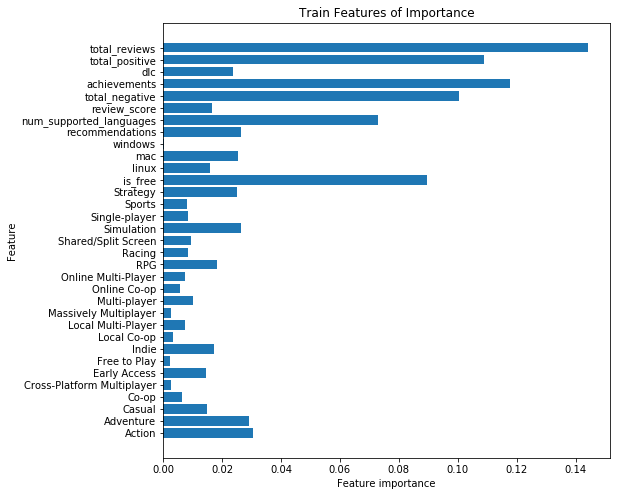

In [1649]:
run_reports(clf, y_train1, y_pred_train, "Train Features of Importance")

In [1650]:
print("\nWithout base model parameters")
clf, y_pred_train, y_pred_test = decision_tree(X_train, X_test, y_train1, y_test1, "entropy", 10)


Without base model parameters
Our train accuracy is :59.640449438202246
Our test accuracy is :50.943396226415096


Classification Report:
                    1           2           3           4    micro avg  \
f1-score     0.677036    0.526939    0.333333    0.445055     0.509434   
precision    0.799136    0.445445    0.362587    0.489426     0.509434   
recall       0.587302    0.644928    0.308448    0.408060     0.509434   
support    630.000000  690.000000  509.000000  397.000000  2226.000000   

             macro avg  weighted avg  
f1-score      0.495591      0.510545  
precision     0.524149      0.534444  
recall        0.487184      0.509434  
support    2226.000000   2226.000000  


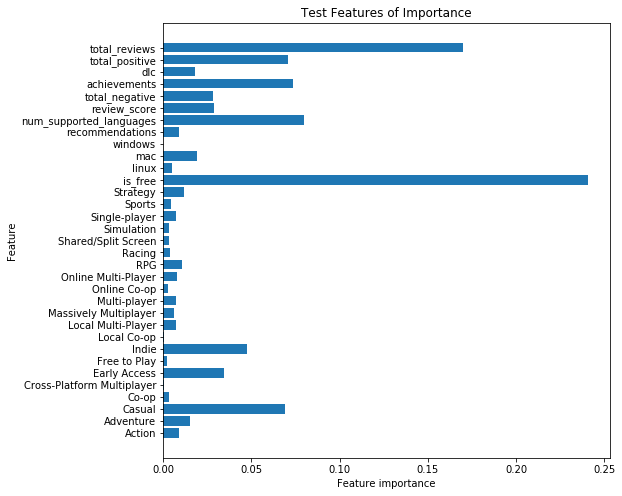

In [1651]:
run_reports(clf, y_test1, y_pred_test, "Test Features of Importance")

## Baseline Model was poor let's try a Random Forest

In [1656]:
r_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
r_clf.fit(X_train, y_train1)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc = r_clf.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Our train accuracy is :50.80898876404495
Our test accuracy is :50.58400718778078


In [1657]:
r_clf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=10)
r_clf.fit(X_train, y_train1)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc = r_clf.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Our train accuracy is :51.49438202247191
Our test accuracy is :50.718778077268645


Classification Report:
                     1            2            3            4    micro avg  \
f1-score      0.743584     0.586754     0.447494     0.554340     0.596404   
precision     0.855860     0.487471     0.498752     0.618612     0.596404   
recall        0.657350     0.736822     0.405790     0.502167     0.596404   
support    2755.000000  2561.000000  1969.000000  1615.000000  8900.000000   

             macro avg  weighted avg  
f1-score      0.583043      0.598610  
precision     0.615174      0.627799  
recall        0.575532      0.596404  
support    8900.000000   8900.000000  


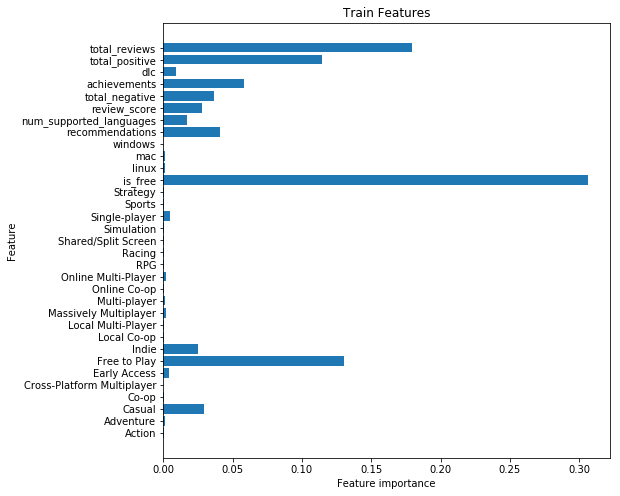

In [1659]:
run_reports(r_clf, y_train1, y_pred_train, "Train Features")

In [1662]:
r_clf2 = r_clf.estimators_[0]

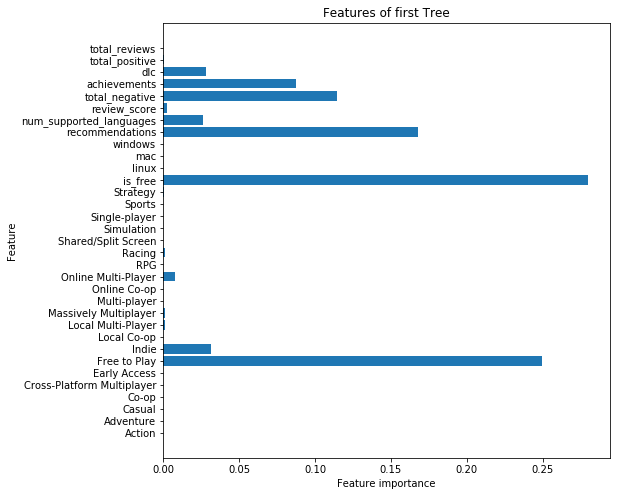

In [1669]:
# the features of importance of the first tree
plot_feature_importances(r_clf2, "Features of first Tree")


In [1672]:
r_clf3 = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=30)
r_clf3.fit(X_train, y_train1)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc = r_clf3.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf3.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Our train accuracy is :52.157303370786515
Our test accuracy is :50.62893081761006


Classification Report:
                    1           2           3           4    micro avg  \
f1-score     0.677036    0.526939    0.333333    0.445055     0.509434   
precision    0.799136    0.445445    0.362587    0.489426     0.509434   
recall       0.587302    0.644928    0.308448    0.408060     0.509434   
support    630.000000  690.000000  509.000000  397.000000  2226.000000   

             macro avg  weighted avg  
f1-score      0.495591      0.510545  
precision     0.524149      0.534444  
recall        0.487184      0.509434  
support    2226.000000   2226.000000  


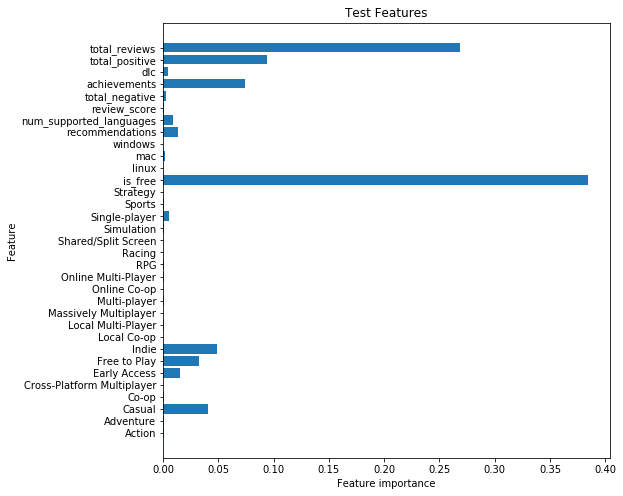

In [1673]:
run_reports(r_clf3, y_test1, y_pred_test, "Test Features")

In [1]:
r_clf4 = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
r_clf4.fit(X_train, y_train1)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc = r_clf4.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf4.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))

NameError: name 'RandomForestClassifier' is not defined

## Model is not much better let's use XGBoost

In [1678]:
# !conda install -y py-xgboost
import xgboost as xgb

Solving environment: done

## Package Plan ##

  environment location: /Users/flatironschool/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxgboost-0.80            |       h0a44026_0         2.1 MB
    py-xgboost-0.80            |   py37h0a44026_0         1.1 MB
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/osx-64::libxgboost-0.80-h0a44026_0
  llvm-openmp        pkgs/main/osx-64::llvm-openmp-4.0.1-hcfea43d_1
  py-xgboost         pkgs/main/osx-64::py-xgboost-0.80-py37h0a44026_0



py-xgboost-0.80      | 1.1 MB    | ##################################### | 100% 
libxgboost-0.80      | 2.1 MB    | ##########

In [ ]:
x_clf = xgb.XGBClassifier()
x_clf.fit(X_train, y_train1)
y_train_pred = x_clf.predict(X_train)
y_test_pred = x_clf.predict(X_test)

acc = accuracy_score(ytrain1,y_pred_train) * 100
print("Our train accuracy is :{0}".format(acc))

acc = accuracy_score(ytest1, y_pred_test) * 100
print("Our test accuracy is :{0}".format(acc))